In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np, scipy.stats as st
#from google.colab import drive

In [2]:
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
vm ='1'

In [ ]:
vm ='2'

In [ ]:
vm ='3'

In [4]:
tipo = '6s'

In [4]:
tipo = '60s'

In [5]:
if tipo == '6s':  
  caliperS = pd.read_csv('./small/cluster2_small.txt')
  caliperM = pd.read_csv('./medium/cluster2_medium.txt')
  caliperL = pd.read_csv('./xlarge/cluster2_xlarge.txt')
elif tipo == '60s':
  caliperS = pd.read_csv('./Small60s/cluster2_small.txt')
  caliperM = pd.read_csv('./Medium60s/cluster2_medium.txt')
  caliperL = pd.read_csv('./Xlarge60s/cluster2_xlarge.txt')
caliperL

,Unnamed: 0,Name,Succ,Fail,SendRate(TPS),MaxLatency(s),MinLatency(s),AvgLatency(s),Throughput(TPS),Unnamed: 9
0,NaN,rnd01,604,0,10.1,2.05,0.05,0.47,9.7,NaN
1,NaN,rnd02,604,0,10.1,2.07,0.05,0.47,9.7,NaN
2,NaN,rnd03,604,0,10.1,2.05,0.04,0.46,9.7,NaN
3,NaN,rnd04,604,0,10.1,2.05,0.04,0.47,9.7,NaN
4,NaN,rnd05,604,0,10.1,2.05,0.04,0.47,9.7,NaN
...,...,...,...,...,...,...,...,...,...,...
105,NaN,rnd06,12004,0,200.0,2.08,0.04,0.09,193.4,NaN
106,NaN,rnd07,12004,0,200.0,2.05,0.04,0.09,193.5,NaN
107,NaN,rnd08,12004,0,200.0,2.06,0.04,0.09,193.4,NaN
108,NaN,rnd09,12004,0,200.0,2.06,0.04,0.09,193.4,NaN


In [6]:
vazS = []
rdns = caliperS['Throughput(TPS)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  vazS.append(np.mean(i))
print([ float("%.02f" % x) for x in vazS])

vazM = []
rdns = caliperM['Throughput(TPS)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  vazM.append(np.mean(i))
print([ float("%.02f" % x) for x in vazM])

vazL = []
rdns = caliperL['Throughput(TPS)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  vazL.append(np.mean(i))
print([ float("%.02f" % x) for x in vazL])


[9.7, 19.4, 38.7, 58.1, 77.4, 96.73, 116.08, 135.35, 154.65, 174.03, 193.22]
[9.7, 19.4, 38.7, 58.1, 77.4, 96.77, 116.1, 135.44, 154.79, 174.08, 193.4]
[9.7, 19.4, 38.7, 58.1, 77.4, 96.76, 116.1, 135.43, 154.8, 174.1, 193.42]


In [7]:
latS = []
rdns = caliperS['AvgLatency(s)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  latS.append(np.mean(i))
print([ float("%.02f" % x) for x in latS])

latM = []
rdns = caliperM['AvgLatency(s)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  latM.append(np.mean(i))
print([ float("%.02f" % x) for x in latM])

latL = []
rdns = caliperL['AvgLatency(s)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  latL.append(np.mean(i))
print([ float("%.02f" % x) for x in latL])

[0.48, 0.27, 0.17, 0.13, 0.12, 0.11, 0.13, 0.18, 0.19, 0.18, 0.23]
[0.47, 0.27, 0.16, 0.13, 0.11, 0.1, 0.1, 0.1, 0.11, 0.11, 0.13]
[0.46, 0.26, 0.16, 0.12, 0.1, 0.09, 0.09, 0.09, 0.08, 0.09, 0.09]


In [8]:
obj = {'Small': latS,
       'Medium':latM,
       'xLarge':latL}
df = pd.DataFrame(data=obj)
df_laten = df.copy() 
for column in df_laten.columns: 
    df_laten[column] = df_laten[column]
display(df_laten)

,Small,Medium,xLarge
0,0.480,0.470,0.465
1,0.271,0.267,0.260
2,0.170,0.162,0.156
3,0.133,0.127,0.120
4,0.120,0.112,0.100
5,0.113,0.101,0.092
6,0.133,0.100,0.091
7,0.178,0.100,0.087
8,0.194,0.106,0.081
9,0.181,0.111,0.089


In [9]:
maquinas=("small","medium","large")

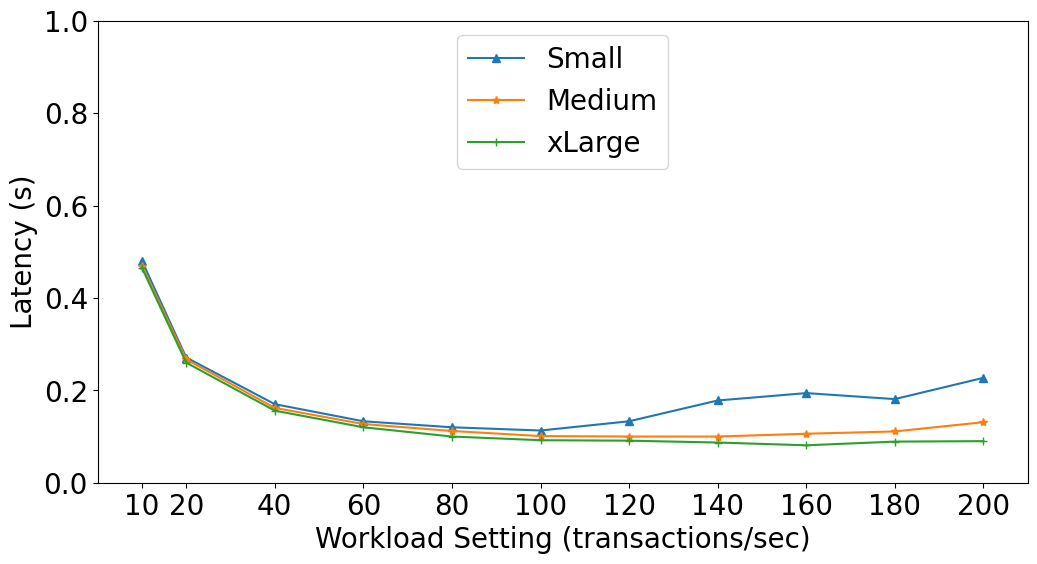

In [10]:
p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
#ax.set_title('Latência para Ethereum Provider por vCPU')
ax.set_xlabel('Workload Setting (transactions/sec)')
ax.set_ylabel('Latency (s)')
ax.plot(p,df_laten['Small'],marker="^", label="Small")
ax.plot(p,df_laten['Medium'],marker="*", label="Medium")
ax.plot(p,df_laten['xLarge'],marker="+", label="xLarge")
ax.set_xlim(0, 210)
ax.set_ylim(0, 1.0)
plt.xticks(p)
plt.legend(loc = 9)
plt.savefig('graph_latency_HyperLd_'+tipo+'.pdf')
plt.show()

In [11]:
def erroMedia(cl,var):
  erro = []
  rdns = cl[var]
  partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
  for i in partes:
    interval = st.t.interval(alpha=0.90,df=len(i)-1,loc=np.mean(i),scale=st.sem(i))
    erro.append(np.mean(i) - interval[0])
  return erro

In [12]:
print(erroMedia(caliperS,'AvgLatency(s)'))
print(erroMedia(caliperM,'AvgLatency(s)'))
print(erroMedia(caliperL,'AvgLatency(s)'))

[5.551115123125783e-17, 0.0018331129326536466, 2.7755575615628914e-17, 0.002800126257095914, 1.3877787807814457e-17, 0.002800126257095914, 0.002800126257095914, 0.008106330394613503, 0.02189527874689684, 0.006379420294117283, 0.009871615252429466]
[5.551115123125783e-17, 0.002800126257095914, 0.0036662258653072655, 0.002800126257095928, 0.002444150576871515, 0.0018331129326536327, nan, nan, 0.002993460883932181, 0.0018331129326536327, 0.005075659876601468]
[0.0030551882210893555, 5.551115123125783e-17, 0.002993460883932181, 1.3877787807814457e-17, nan, 0.002444150576871515, 0.0018331129326536327, 0.002800126257095914, 0.0018331129326536327, 0.0018331129326536327, 0.002732643418565009]


C:\Users\erick\AppData\Local\Temp\ipykernel_17456\3983291287.py:6: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval = st.t.interval(alpha=0.90,df=len(i)-1,loc=np.mean(i),scale=st.sem(i))
C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


C:\Users\erick\AppData\Local\Temp\ipykernel_17456\3983291287.py:6: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval = st.t.interval(alpha=0.90,df=len(i)-1,loc=np.mean(i),scale=st.sem(i))


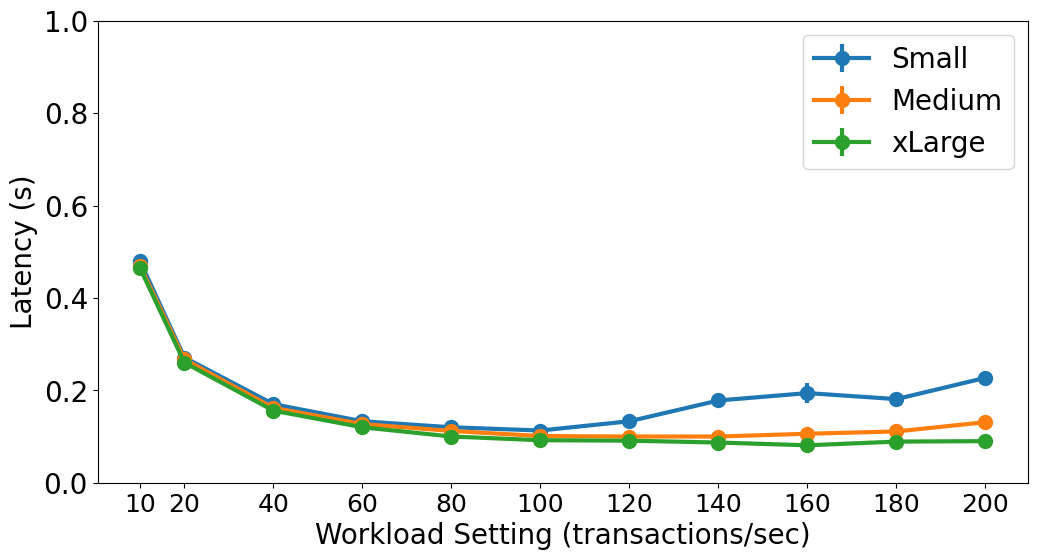

In [13]:
x = [10, 20, 40, 60,80, 100, 120,140, 160,180, 200]


# fig = plt.figure()
# plt.subplots(figsize =(15,8))
fig,ax = plt.subplots(figsize =(12,6))
plt.xlabel('Workload Setting (transactions/sec)', fontsize=20)
plt.ylabel('Latency (s)',size=20)

plt.errorbar(x, latS, yerr=erroMedia(caliperS,'AvgLatency(s)'),marker='.',label='Small', linewidth=3, markersize=20)

plt.errorbar(x, latM, yerr=erroMedia(caliperM,'AvgLatency(s)'),marker='.',label='Medium', linewidth=3, markersize=20)

plt.errorbar(x, latL, yerr=erroMedia(caliperL,'AvgLatency(s)'),marker='.',label='xLarge', linewidth=3, markersize=20)

plt.xticks(x, fontsize=18)

ax.set_ylim(0, 1)

plt.legend()
plt.savefig('graph_latency_error_HyperLd_'+tipo+'.pdf')

In [14]:
obj = {'Small': [0.126, 0.073,	0.044,	0.035,	0.038, 0.029, 0.033, 0.044, 0.060, 0.073,	0.173],
       'Medium':[0.250, 0.143,	0.085,	0.067,	0.058,	0.054,	0.049,	0.049,	0.054,	0.054,	0.058],
       'xLarge':[1.000,	0.554,	0.321,	0.250,	0.214,	0.179,	0.179,	0.161, 0.161, 0.161,	0.179]}
df = pd.DataFrame(data=obj)
df_max_scaled = df.copy() 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df.abs().max().max() 
display(df_max_scaled)

,Small,Medium,xLarge
0,0.126,0.250,1.000
1,0.073,0.143,0.554
2,0.044,0.085,0.321
3,0.035,0.067,0.250
4,0.038,0.058,0.214
5,0.029,0.054,0.179
6,0.033,0.049,0.179
7,0.044,0.049,0.161
8,0.060,0.054,0.161
9,0.073,0.054,0.161


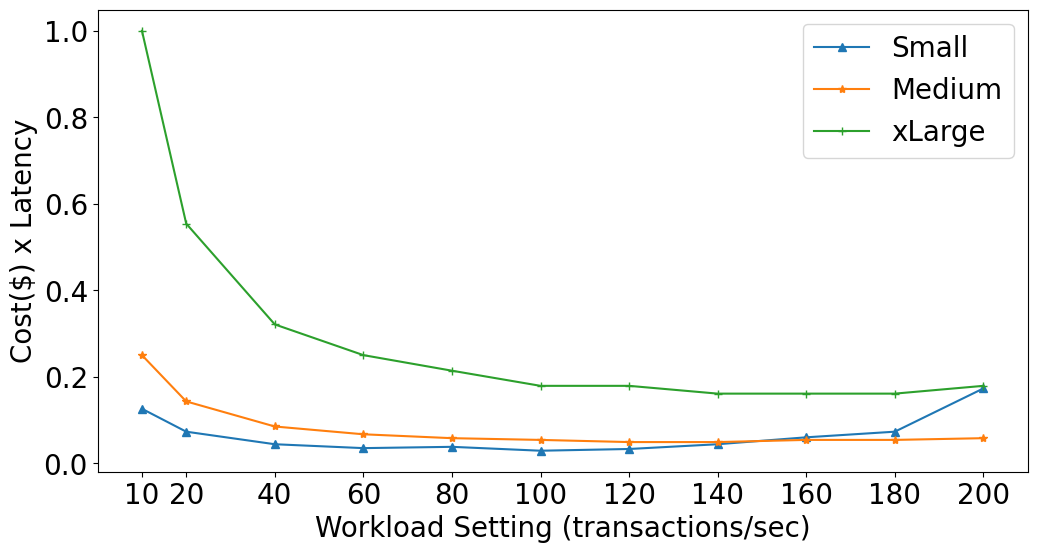

In [15]:

p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
#ax.set_title('Latência para Ethereum Provider por vCPU')
ax.set_xlabel('Workload Setting (transactions/sec)')
ax.set_ylabel('Cost($) x Latency')
ax.plot(p,df_max_scaled['Small'],marker="^", label="Small")
ax.plot(p,df_max_scaled['Medium'],marker="*", label="Medium")
ax.plot(p,df_max_scaled['xLarge'],marker="+", label="xLarge")
ax.set_xlim(0, 210)
plt.xticks(p)
plt.legend()
plt.legend()
plt.savefig('graphic_costs_HyperLd_'+tipo+'.pdf')
plt.show()

In [16]:
if tipo == '6s':  
    monitorS = pd.read_csv('./small/TxMonitor-vm'+vm+'-cluster2_small.csv')
    monitorM = pd.read_csv('./medium/TxMonitor-vm'+vm+'-cluster2_medium.csv')
    monitorL = pd.read_csv('./xlarge/TxMonitor-vm'+vm+'-cluster2_xlarge.csv')
elif tipo == '60s':
    monitorS = pd.read_csv('./Small60s/TxMonitor-vm'+vm+'-cluster2_small.csv')
    monitorM = pd.read_csv('./Medium60s/TxMonitor-vm'+vm+'-cluster2_medium.csv')
    monitorL = pd.read_csv('./Xlarge60s/TxMonitor-vm'+vm+'-cluster2_xlarge.csv')


In [17]:
def filtro_cpu_mem(vm):
  vm__cpu_mean = []
  vm__cpu_erro = []
  vm_cpu_filtro = []
  cpu = []
  for i in range(1,12):
      l_round_x = vm.query('round==%s'%i)
      cpu = l_round_x['cpu(%)']
      vm_cpu_filtro.append(cpu.tolist())
      cpu_mean = np.mean(cpu)
      cpu_erro = st.t.interval(0.05, len(cpu)-1, loc=np.mean(cpu), scale=st.sem(cpu))
      vm__cpu_mean.append(cpu_mean)
      vm__cpu_erro.append(cpu_erro[1] - cpu_erro[0])
  return vm_cpu_filtro

In [18]:
vmS_cpu = filtro_cpu_mem(monitorS)
vmM_cpu = filtro_cpu_mem(monitorM)
vmL_cpu = filtro_cpu_mem(monitorL)

In [19]:
def grafico(filtro,txt1,txt2,y,ytick,type=0,outfile=0):
    x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
    plt.rcParams.update({'font.size':20})
    fig,ax = plt.subplots(figsize =(12,6))
    ax.set_xlabel(txt2)
    ax.set_ylabel(txt1)
    if(type==1): # net MBytes/seg.
      ax.set_ylim(0, 10)
      ax.set_yticks(range(0, 11, 2))
    else:
      ax.set_ylim(-3, 110)    
      ax.set_yticks(range(0, 110, 20))
    ax.boxplot(filtro, widths=10 ,labels=x, positions=p)
    plt.yticks(ytick)
    return plt

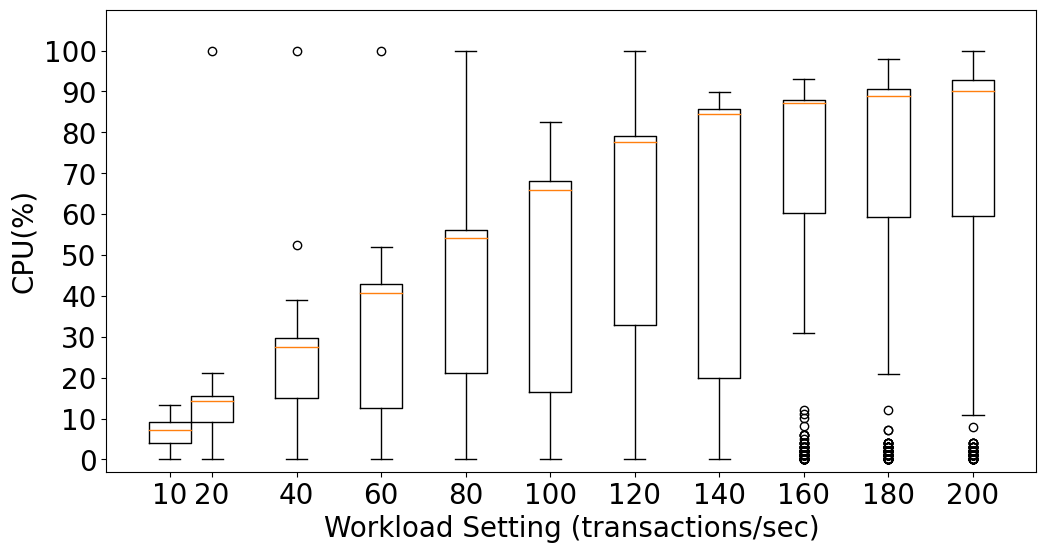

In [20]:
plt1_cpu = grafico(vmS_cpu,'CPU(%)','Workload Setting (transactions/sec)',vazS,[0,10, 20,30,40,50, 60,70, 80,90, 100])
plt1_cpu.savefig('graphic_Hyperld_vm'+vm+'_CPU_Small.pdf')

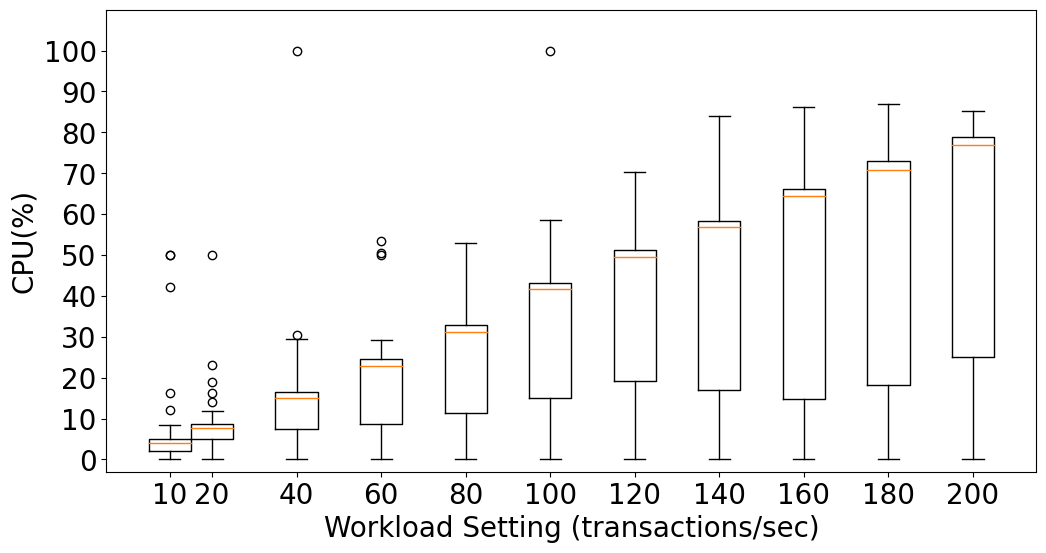

In [21]:
plt1_cpu = grafico(vmM_cpu,'CPU(%)','Workload Setting (transactions/sec)',vazM,[0,10, 20,30,40,50, 60,70, 80,90, 100])
plt1_cpu.savefig('graphic_Hyperld_vm'+vm+'_CPU_Medium.pdf')

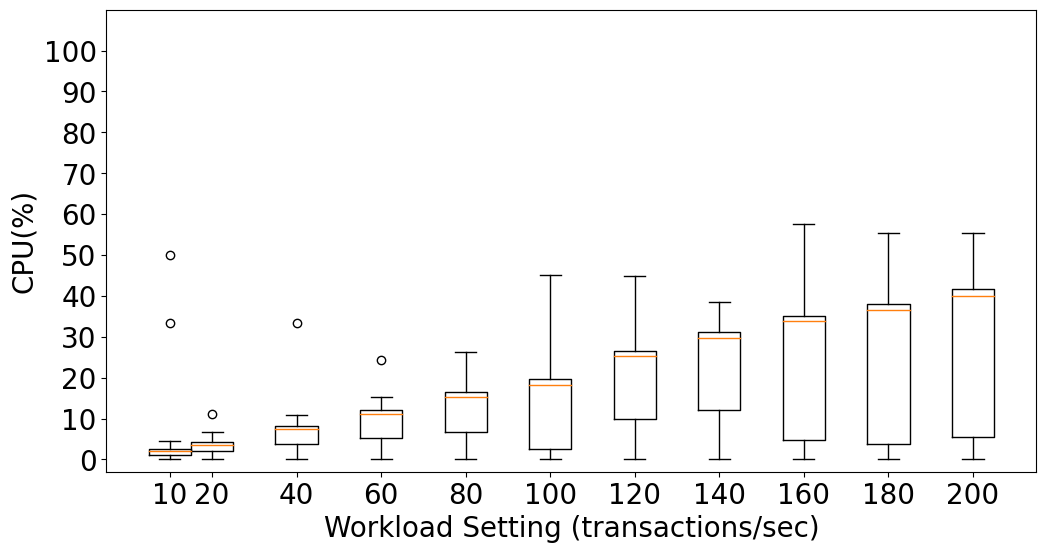

In [22]:
plt1_cpu = grafico(vmL_cpu,'CPU(%)','Workload Setting (transactions/sec)',vazL,[0,10, 20,30,40,50, 60,70, 80,90, 100])
plt1_cpu.savefig('graphic_Hyperld_vm'+vm+'_Xlarge.pdf')